In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# deleting the id column from data
data=data.drop('Id', axis=1)

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data analysis

<Axes: >

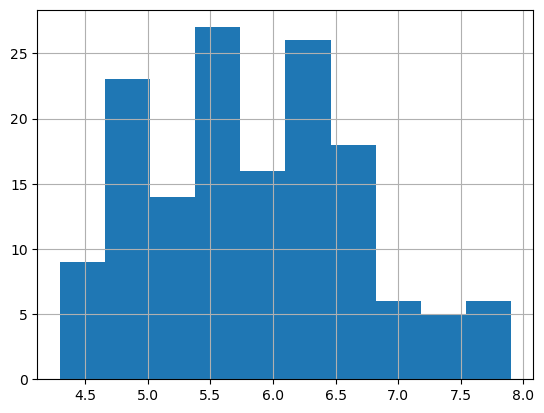

In [9]:
data['SepalLengthCm'].hist()

<Axes: >

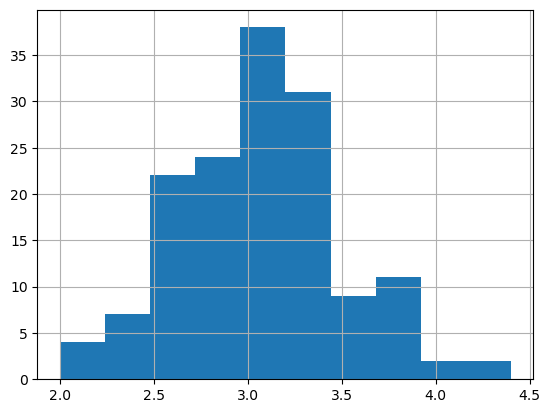

In [10]:
data['SepalWidthCm'].hist()

<Axes: >

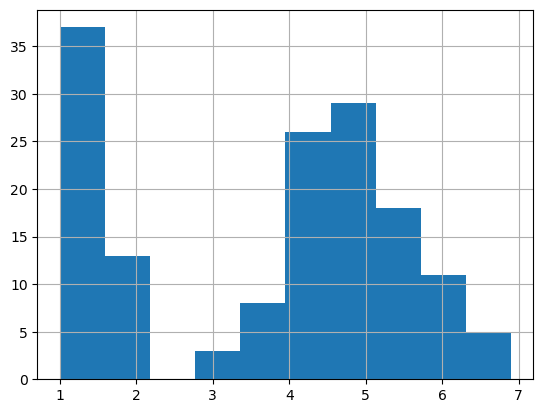

In [11]:
data['PetalLengthCm'].hist()

<Axes: >

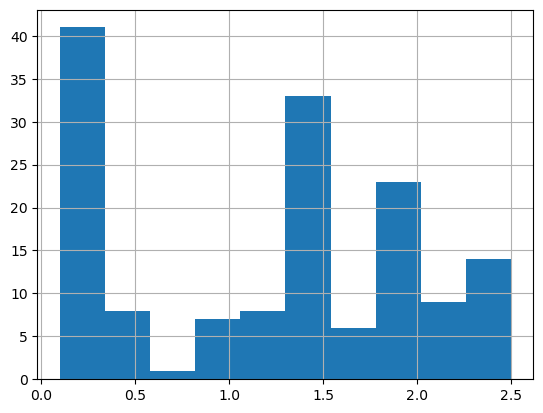

In [12]:
data['PetalWidthCm'].hist()

In [13]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

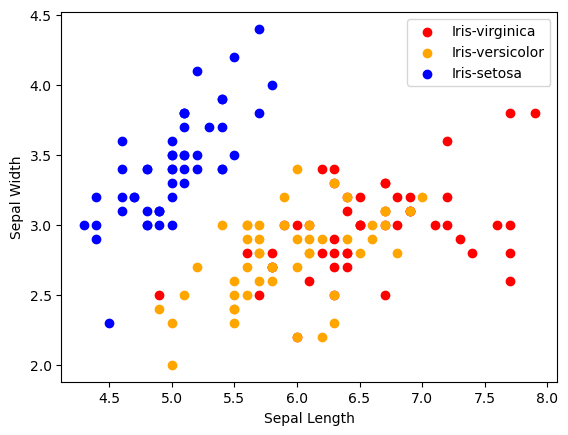

In [14]:
for i in range(3):    
    x=data[data['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

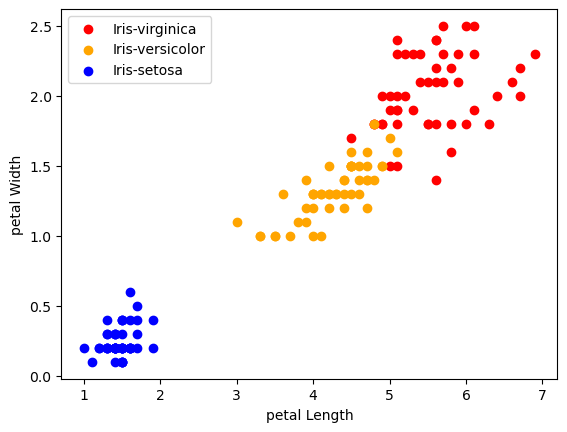

In [15]:
for i in range(3):
    x=data[data['Species']==Species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.legend()

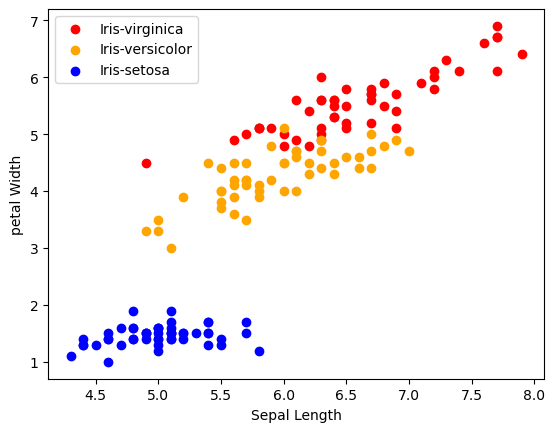

In [16]:
for i in range(3):
    x=data[data['Species']==Species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('petal Width')
plt.legend()

# Correlation Matrix

In [17]:
data.corr(numeric_only=all)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

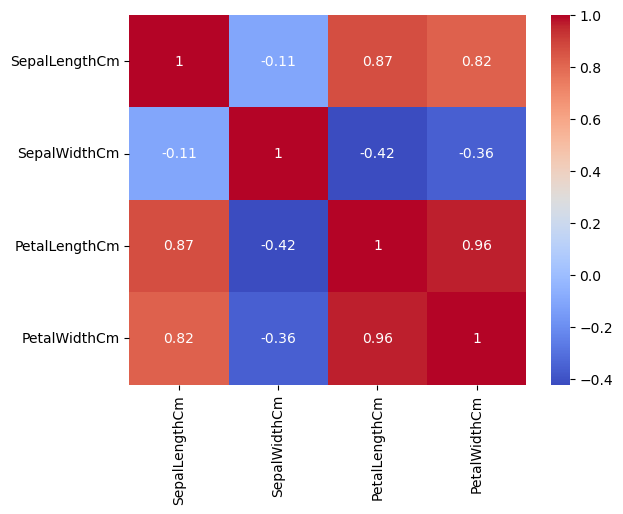

In [18]:
sns.heatmap(data.corr(numeric_only=all), annot=True, cmap= 'coolwarm')

# Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
data['Species']= le.fit_transform(data['Species'])

# Model Training and Testing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
x=data.drop('Species', axis=1)
y=data['Species']

In [23]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Logistic Regression Model

In [24]:
log= LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [25]:
pred1= log.predict(x_test)

In [26]:
pred1

array([1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       2])

In [27]:
confusion_matrix(y_test, pred1)

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 17]], dtype=int64)

In [28]:
accuracy_score(y_test, pred1)

1.0

### knearest neighbours

In [29]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
pred2 = knn.predict(x_test)

In [31]:
confusion_matrix(y_test, pred2)

array([[13,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 17]], dtype=int64)

In [32]:
accuracy_score(y_test, pred2)

0.9777777777777777

### Decision Tree Classifier

In [33]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
pred3 = dt.predict(x_test)

In [35]:
confusion_matrix(y_test, pred3)

array([[13,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 17]], dtype=int64)

In [36]:
accuracy_score(y_test, pred3)

0.9333333333333333

### Naive Bayes Classifier

In [37]:
naive= GaussianNB()
naive.fit(x_train, y_train)

GaussianNB()

In [38]:
pred4 = dt.predict(x_test)

In [39]:
confusion_matrix(y_test, pred4)

array([[13,  0,  0],
       [ 0, 12,  3],
       [ 0,  0, 17]], dtype=int64)

In [40]:
accuracy_score(y_test, pred4)

0.9333333333333333

# Accuracy of Fitted Models

In [41]:
Accuracy=[0.97, 0.97, 0.97, 0.97]
Models=['Logistic Regression', 'K-nearest neighbours', 'DecisionTree', 'Naive Bayes']
pd.DataFrame(data=Accuracy, index=Models,columns=['Accuracy'])

,Accuracy
Logistic Regression,0.97
K-nearest neighbours,0.97
DecisionTree,0.97
Naive Bayes,0.97
